In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import Image
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [4]:
with open(r'C:\Users\90477\Desktop\end_info.txt','r',encoding='utf-8') as f:
    info = f.read()

In [5]:
data = []
for i in info.split('\n'):
    try:
        i = eval(i)
    except:
        pass
    else:
        list_keys = list(i.keys())
        list_values = list(i.values())
        data.append(list_values)


In [6]:
df = pd.DataFrame(data,columns = list_keys)
df

,skill_type,city,company_name,company_size,company_type,company_description,company_location,salary,job_required,experience_required,company_welfare
0,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,0.8-1.5万/月,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,无工作经验,年终奖金\n员工旅游\n定期体检\n专业培训\n交通补贴\n通讯补贴\n餐饮补贴\n一年加薪一次
1,Python开发工程师,北京-昌平区,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...,上班地址：昌平南邵,1-1.5万/月,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,3-4年经验,弹性工作\n年终奖金\n绩效奖金\n专业培训\n周末双休
2,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京,北京融联世纪信息技术有限公司,1000-5000人,互联网/电子商务,融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...,上班地址：时代网络大厦,3-5万/月,"岗位职责:1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和...",无工作经验,
3,全栈python开发工程师,北京-朝阳区,北京道冲泰科科技有限公司,少于50人,仪器仪表/工业自动化\n电子技术/半导体/集成电路,北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...,上班地址：北京市朝阳区酒仙桥中路26号鸿运大厦801,15-20万/年,工作描述:* 为桥梁、隧道、地铁等施工建设过程开发安全监测web平台* 为公司研发的监测传感...,5-7年经验,五险一金\n补充医疗保险\n员工旅游\n交通补贴\n餐饮补贴\n通讯补贴\n定期体检\n专业...
4,Python高级开发工程师,北京,叠云（北京）科技股份有限公司,50-150人,计算机软件\n互联网/电子商务,"叠云（北京）科技股份有限公司（股票代码：871400,简称：叠云股份)是联想集团直接投资专注...",上班地址：朝阳区北苑天畅园6号楼23层,1.2-1.5万/月,岗位职责：1、进行电子教室后台部分研发2、进行云端运维系统的研发3、与终端团队配合进行产品联...,无工作经验,五险一金\n定期体检\n周末双休
5,Python高级开发工程师,北京-石景山区,南京高泰科技有限公司,50-150人,计算机软件\n计算机服务(系统、数据服务、维修),我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...,上班地址：北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼,2-2.5万/月,1. 5年以上开发经验，基本功扎实，精通Java；2. ...,5-7年经验,五险一金\n员工旅游\n餐饮补贴\n通讯补贴\n定期体检\n周末双休\n免费班车\n年终奖金...
6,Python实习-机器学习方向,北京-朝阳区,寰宇优才教育科技（北京）有限公司,150-500人,计算机软件,寰宇优才教育科技（北京）有限公司,上班地址：新文化大街,0.8-1万/月,（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）1.本科以上学历，有良好的数...,无工作经验,五险一金\n补充医疗保险\n补充公积金\n员工旅游\n交通补贴\n出国机会\n年终奖金\n绩...
7,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,0.8-1.5万/月,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,无工作经验,年终奖金\n员工旅游\n定期体检\n专业培训\n交通补贴\n通讯补贴\n餐饮补贴\n一年加薪一次
8,Python开发工程师,北京-昌平区,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...,上班地址：昌平南邵,1-1.5万/月,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,3-4年经验,弹性工作\n年终奖金\n绩效奖金\n专业培训\n周末双休
9,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京,北京融联世纪信息技术有限公司,1000-5000人,互联网/电子商务,融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...,上班地址：时代网络大厦,3-5万/月,"岗位职责:1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和...",无工作经验,


### 把工资转换为数字

In [7]:
for i in range(len(df)):
    salary = df.at[i,'salary']
    if salary != '':
        if isinstance(salary,int):
            pass
        elif isinstance(salary,float):
            pass
        elif salary[-1] == '天':
            month_salary = int(salary.replace('元/天',''))*30
        elif salary[-1] == '年':
            if salary[-3] == '万': 
                month_salary = int((float(salary.split('-')[0])*10000+float(salary.split('-')[1].replace('万/年',''))*10000)/24)
            elif salary[-3] == '下':
                month_salary = float(salary.replace('万以下/年',''))*10000
        elif salary[-1] == '月':
            if salary[-3] == '千':
                if len(salary.split('-')) == 2:
                    month_salary = (float(salary.split('-')[0])*1000+float(salary.split('-')[1].replace('千/月',''))*1000)/2
                else:
                    month_salary = float(salary.replace('千/月',''))*1000
            elif salary[-3] == '下':
                month_salary = float(salary.replace('千以下/月',''))*1000
            else:
                month_salary = (float(salary.split('-')[0])*10000+float(salary.split('-')[1].replace('万/月',''))*10000)/2
    else:
        month_salary = 0
    df.at[i,'salary'] = month_salary
            
        #df.at[i,'salary'] = month_salary

### 把工作年限转换为数字

In [8]:
for i in range(len(df)):
    exp = df.at[i,'experience_required']
    if exp == '无工作经验':
        exp = 0
    elif exp[-3] == '年':
        if len(exp.split('-')) == 2:
            exp = int(exp.split('-')[0])
        else:
            exp = int(exp.replace('年经验',''))
    elif exp[-3] == '上':
        exp = int(exp.replace('年以上经验',''))
    df.at[i,'experience_required'] = exp

### 删除北京以外的其他地区

In [9]:
a = ['北京-东城区','北京-丰台区','北京-大兴区','北京-延庆区','北京-房山区','北京-昌平区','北京-朝阳区','北京-海淀区','北京-石景山区','北京-西城区','北京-通州区','北京-门头沟区','北京-顺义区']
df_1 = df[df['city'].isin(a)]
df_1 = df_1.reset_index(drop=True)
df_1

,skill_type,city,company_name,company_size,company_type,company_description,company_location,salary,job_required,experience_required,company_welfare
0,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,11500,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,0,年终奖金\n员工旅游\n定期体检\n专业培训\n交通补贴\n通讯补贴\n餐饮补贴\n一年加薪一次
1,Python开发工程师,北京-昌平区,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...,上班地址：昌平南邵,12500,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,3,弹性工作\n年终奖金\n绩效奖金\n专业培训\n周末双休
2,全栈python开发工程师,北京-朝阳区,北京道冲泰科科技有限公司,少于50人,仪器仪表/工业自动化\n电子技术/半导体/集成电路,北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...,上班地址：北京市朝阳区酒仙桥中路26号鸿运大厦801,14583,工作描述:* 为桥梁、隧道、地铁等施工建设过程开发安全监测web平台* 为公司研发的监测传感...,5,五险一金\n补充医疗保险\n员工旅游\n交通补贴\n餐饮补贴\n通讯补贴\n定期体检\n专业...
3,Python高级开发工程师,北京-石景山区,南京高泰科技有限公司,50-150人,计算机软件\n计算机服务(系统、数据服务、维修),我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...,上班地址：北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼,22500,1. 5年以上开发经验，基本功扎实，精通Java；2. ...,5,五险一金\n员工旅游\n餐饮补贴\n通讯补贴\n定期体检\n周末双休\n免费班车\n年终奖金...
4,Python实习-机器学习方向,北京-朝阳区,寰宇优才教育科技（北京）有限公司,150-500人,计算机软件,寰宇优才教育科技（北京）有限公司,上班地址：新文化大街,9000,（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）1.本科以上学历，有良好的数...,0,五险一金\n补充医疗保险\n补充公积金\n员工旅游\n交通补贴\n出国机会\n年终奖金\n绩...
5,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,11500,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,0,年终奖金\n员工旅游\n定期体检\n专业培训\n交通补贴\n通讯补贴\n餐饮补贴\n一年加薪一次
6,Python开发工程师,北京-昌平区,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...,上班地址：昌平南邵,12500,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,3,弹性工作\n年终奖金\n绩效奖金\n专业培训\n周末双休
7,全栈python开发工程师,北京-朝阳区,北京道冲泰科科技有限公司,少于50人,仪器仪表/工业自动化\n电子技术/半导体/集成电路,北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...,上班地址：北京市朝阳区酒仙桥中路26号鸿运大厦801,14583,工作描述:* 为桥梁、隧道、地铁等施工建设过程开发安全监测web平台* 为公司研发的监测传感...,5,五险一金\n补充医疗保险\n员工旅游\n交通补贴\n餐饮补贴\n通讯补贴\n定期体检\n专业...
8,Python高级开发工程师,北京-石景山区,南京高泰科技有限公司,50-150人,计算机软件\n计算机服务(系统、数据服务、维修),我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...,上班地址：北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼,22500,1. 5年以上开发经验，基本功扎实，精通Java；2. ...,5,五险一金\n员工旅游\n餐饮补贴\n通讯补贴\n定期体检\n周末双休\n免费班车\n年终奖金...
9,Python开发工程师,北京-朝阳区,中国广视索福瑞媒介研究有限责任公司,500-1000人,专业服务(咨询、人力资源、财会),中国广视索福瑞媒介研究(CSM)是国内领先的广播电视受众研究机构，是央视市场研究(CTR)与...,上班地址：建国路甲92号世茂大厦24层,17500,**工作职责** 1 Web系统开发和维护； 2 大数据处理和分析； 3 参与维护已有的大数...,3,五险一金\n定期体检


### 薪资分布

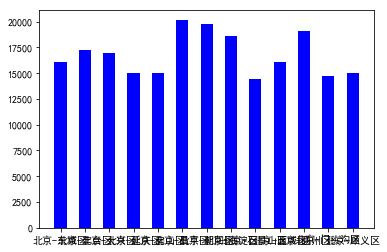

In [10]:
y = []
for i in a:
    df_n = df_1[df_1.city.isin([i])]
    average_wage = int(sum(df_n.salary)/len(df_n))
    y.append(average_wage)
plt.bar(a,y,color = 'b',width = 0.5)
plt.show()

### 各地区工作需求分析

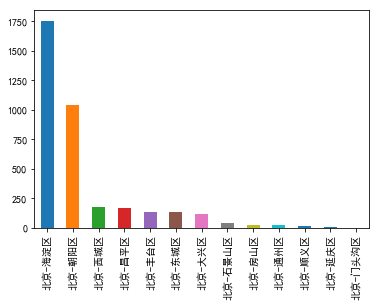

In [11]:
df_1.city.value_counts().plot.bar()

### 工作年限需求分析

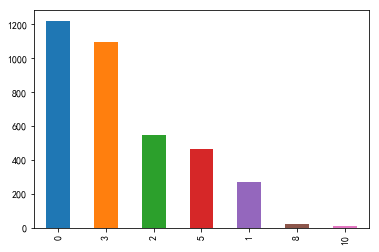

In [12]:
df_1.groupby('experience_required').count().sort_values('skill_type',ascending = False).skill_type
df_1.experience_required.value_counts().plot.bar()

### 公司一般提供的福利诱惑

<BarContainer object of 17 artists>

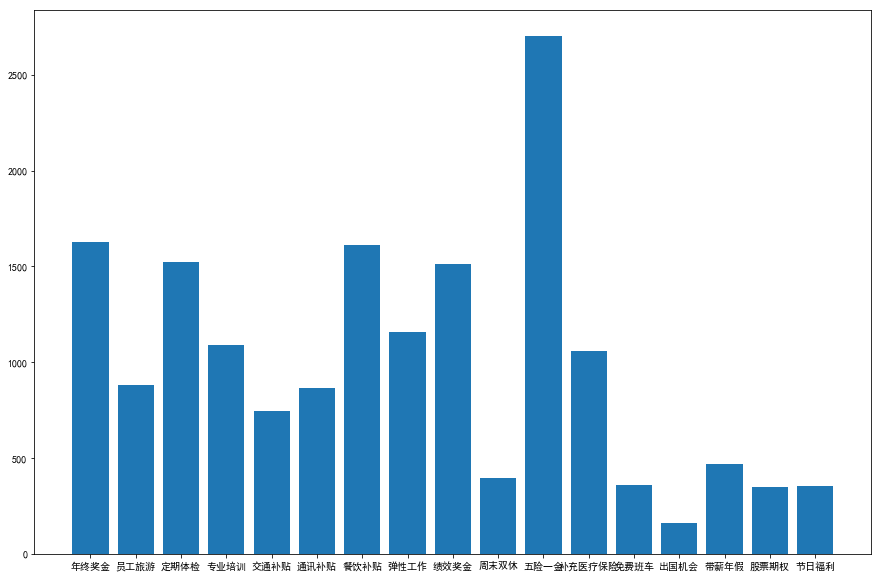

In [25]:
usual_welfare = []
for i in range(len(df_1)):
    welfare = df_1.at[i,'company_welfare']
    if welfare != '':
        for x in welfare.split('\n'):
            usual_welfare.append(x)
            
from collections import Counter

c = dict(Counter(usual_welfare))
d = c.copy()
for x,y in c.items():
    if y < 100:
        del d[x]
fig=plt.figure(figsize=(15, 10))
plt.bar(d.keys(),d.values())


### 薪资和工作年限的关系

<BarContainer object of 7 artists>

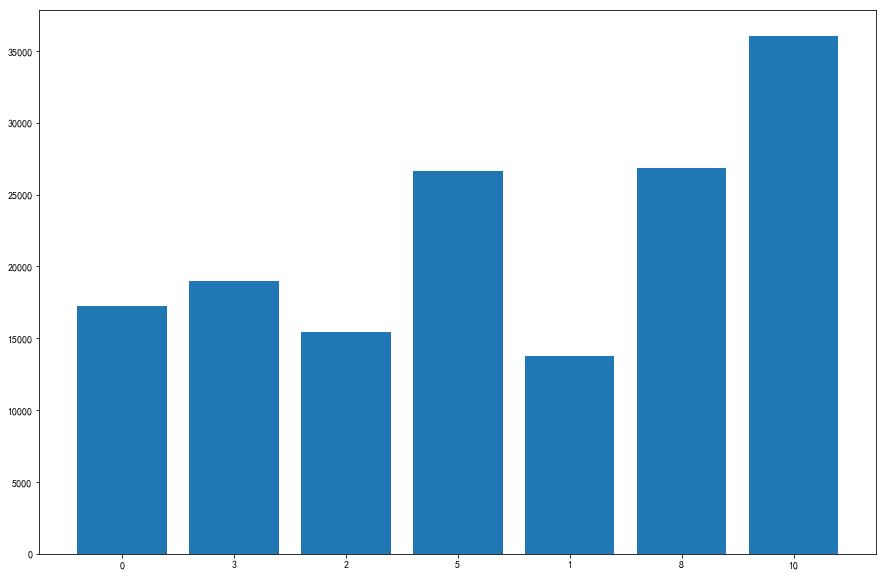

In [48]:
index = list(df_1['experience_required'].value_counts().index)
g = []
h = []
for i in index:
    e = df_1[df_1['experience_required'].isin([i])]
    f = sum(e['salary'])/len(e)
    g.append(f)
    h.append(str(i))

fig=plt.figure(figsize=(15, 10))
plt.bar(h,g)

In [269]:
### 薪资和工作地区的关系

In [270]:
df_1['city'].corr(df_1['salary'],method ='spearman',min_periods = 0)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


-0.007549294585556886